In [1]:
'''
Patrick Ballou
ID: 801130521
ECGR 4105
Homework 3
Problem 1
'''

'\nPatrick Ballou\nID: 801130521\nECGR 4105\nHomework 3\nProblem 1\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import PrecisionRecallDisplay

In [3]:
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape
breast_input = pd.DataFrame(breast_data)

In [4]:
breast_labels = breast.target
breast_labels.shape
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data, labels],axis=1)
final_breast_data.shape

(569, 31)

In [5]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
features_labels = np.append(features, 'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [7]:
#train/test split, random_state functions as seed
df_train, df_test = train_test_split(breast_dataset, train_size=.8, random_state=7)

In [8]:
#separate dataset into x and y, train and test
x_train = df_train[features]
Y_train = df_train['label']

x_test = df_test[features]
Y_test = df_test['label']

In [15]:
#standard scaler is best here
scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

model = GaussianNB()

In [16]:
model.fit(X_train, Y_train)

GaussianNB()

In [17]:
expected = Y_test
predicted = model.predict(X_test)

In [18]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
plt.rcParams["figure.figsize"] = (12,8)

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        40
         1.0       1.00      0.92      0.96        74

    accuracy                           0.95       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114

[[40  0]
 [ 6 68]]


In [1]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(expected, predicted), display_labels=[0, 1])
cm_display.plot()

NameError: name 'metrics' is not defined

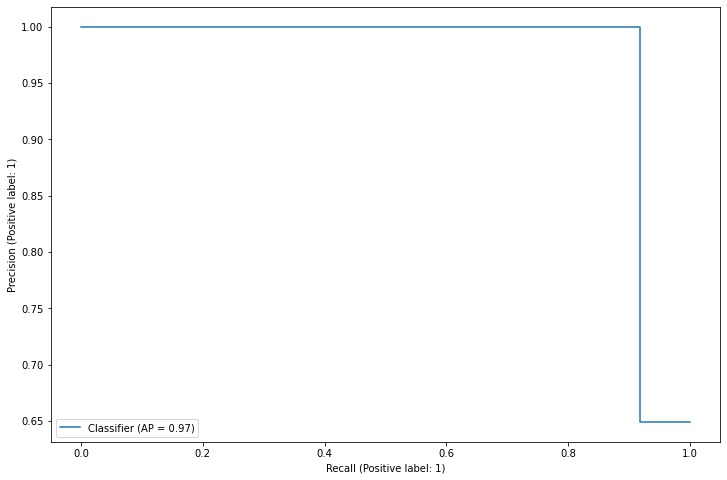

In [ ]:
PrecisionRecallDisplay.from_predictions(expected, predicted)
plt.show()